In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv('AAPL.csv')

In [3]:
df.shape

(252, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df["Date"]=pd.to_datetime(df["Date"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [8]:
df.set_index('Date',inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-07-31 to 2024-07-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-31,196.059998,196.490005,195.259995,196.449997,195.412216,38824100
2023-08-01,196.240005,196.729996,195.279999,195.610001,194.576645,35175100
2023-08-02,195.039993,195.179993,191.850006,192.580002,191.562653,50389300
2023-08-03,191.570007,192.369995,190.690002,191.169998,190.160110,61235200
2023-08-04,185.520004,187.380005,181.919998,181.990005,181.028610,115799700


In [11]:
df.sort_index(inplace=True)

In [12]:
sc=MinMaxScaler()
sc_values=sc.fit_transform(df[df.columns])
sc_values

array([[0.43174464, 0.42482013, 0.45181851, 0.45044391, 0.4373812 ,
        0.06644599],
       [0.43427532, 0.4282084 , 0.45210839, 0.43841303, 0.42545189,
        0.05003663],
       [0.41740463, 0.40632498, 0.40240554, 0.39501574, 0.3824216 ,
        0.11845408],
       ...,
       [0.75003513, 0.74954129, 0.7524996 , 0.75852194, 0.75929245,
        0.07893491],
       [0.72557301, 0.74685878, 0.7487321 , 0.76253222, 0.76328993,
        0.05514831],
       [0.75692399, 0.76140063, 0.75409357, 0.77055282, 0.77128494,
        0.07856166]])

In [13]:
df_scaled=pd.DataFrame(sc_values,columns=df.columns,index=df.index)

In [14]:
df_scaled

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-31,0.431745,0.424820,0.451819,0.450444,0.437381,0.066446
2023-08-01,0.434275,0.428208,0.452108,0.438413,0.425452,0.050037
2023-08-02,0.417405,0.406325,0.402406,0.395016,0.382422,0.118454
2023-08-03,0.368621,0.366653,0.385596,0.374821,0.362398,0.167228
2023-08-04,0.283565,0.296202,0.258513,0.243340,0.232029,0.412601
...,...,...,...,...,...,...
2024-07-24,0.824547,0.824509,0.768729,0.766829,0.767573,0.169667
2024-07-25,0.753269,0.768742,0.732358,0.751790,0.752582,0.122960
2024-07-26,0.750035,0.749541,0.752500,0.758522,0.759292,0.078935


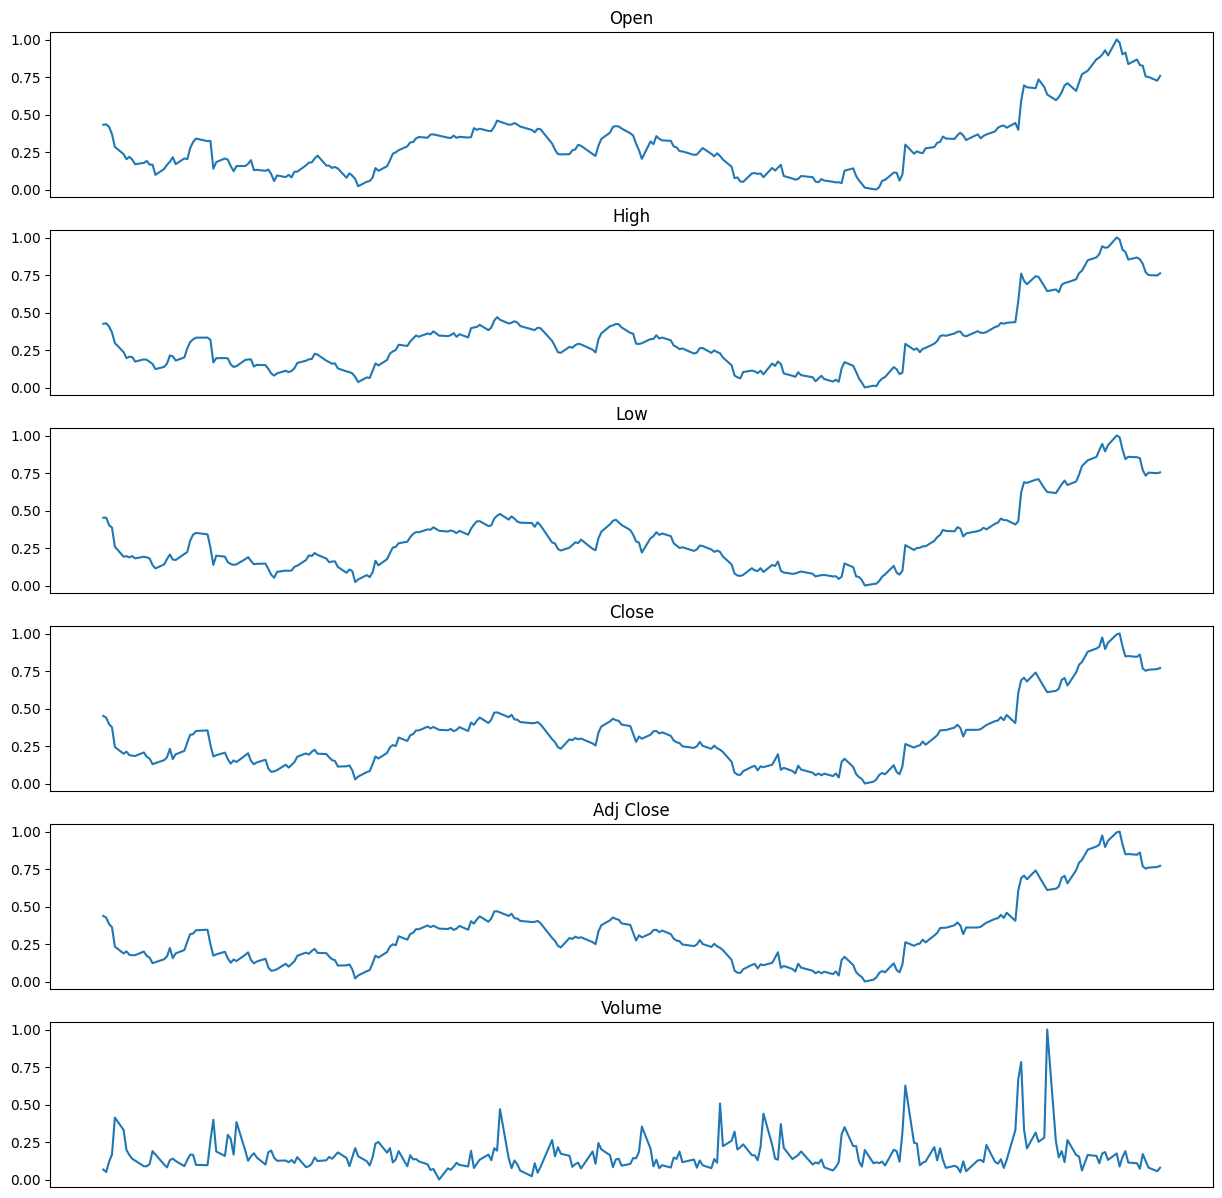

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 15)
figure, axes = plt.subplots(6)
for ax, col in zip(axes, df_scaled.columns):
    ax.plot(df_scaled[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)

In [16]:
def create_sequence(data,window_size):
    X=[]
    y=[]
    for i in range(window_size,len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X),np.array(y)

In [17]:
X,y=create_sequence(df_scaled,window_size=60)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

In [19]:
model=keras.Sequential([
    keras.layers.LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])),
    keras.layers.Dropout(0.3),
    keras.layers.LSTM(units=50,return_sequences=True),
    keras.layers.Dropout(0.3),
    keras.layers.LSTM(units=50,return_sequences=False),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(y_train.shape[1])
])
model.summary()

c:\Users\MRITH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,106 (203.54 KB)

 Trainable params: 52,106 (203.54 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])

In [21]:
early_stopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [22]:
lstm_model=model.fit(X_train,y_train,validation_split=0.2,epochs=100,batch_size=2,callbacks=[early_stopping])

Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - RootMeanSquaredError: 0.2685 - loss: 0.0745 - val_RootMeanSquaredError: 0.1183 - val_loss: 0.0140
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - RootMeanSquaredError: 0.1646 - loss: 0.0274 - val_RootMeanSquaredError: 0.1379 - val_loss: 0.0190
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - RootMeanSquaredError: 0.1439 - loss: 0.0209 - val_RootMeanSquaredError: 0.1080 - val_loss: 0.0117
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - RootMeanSquaredError: 0.1484 - loss: 0.0222 - val_RootMeanSquaredError: 0.0923 - val_loss: 0.0085
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - RootMeanSquaredError: 0.1356 - loss: 0.0185 - val_RootMeanSquaredError: 0.0973 - val_loss: 0.0095
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - RootMeanSquaredError: 0.1274 - loss: 0.0165 - val_RootMeanSquaredError: 0.0939 - val_loss: 0.0088
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - RootMeanSquaredError: 0.1289 - los

In [23]:
model_predictions=model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 943ms/step


In [24]:
model_predictions_rescaled=sc.inverse_transform(model_predictions)
y_test_rescaled=sc.inverse_transform(y_test)

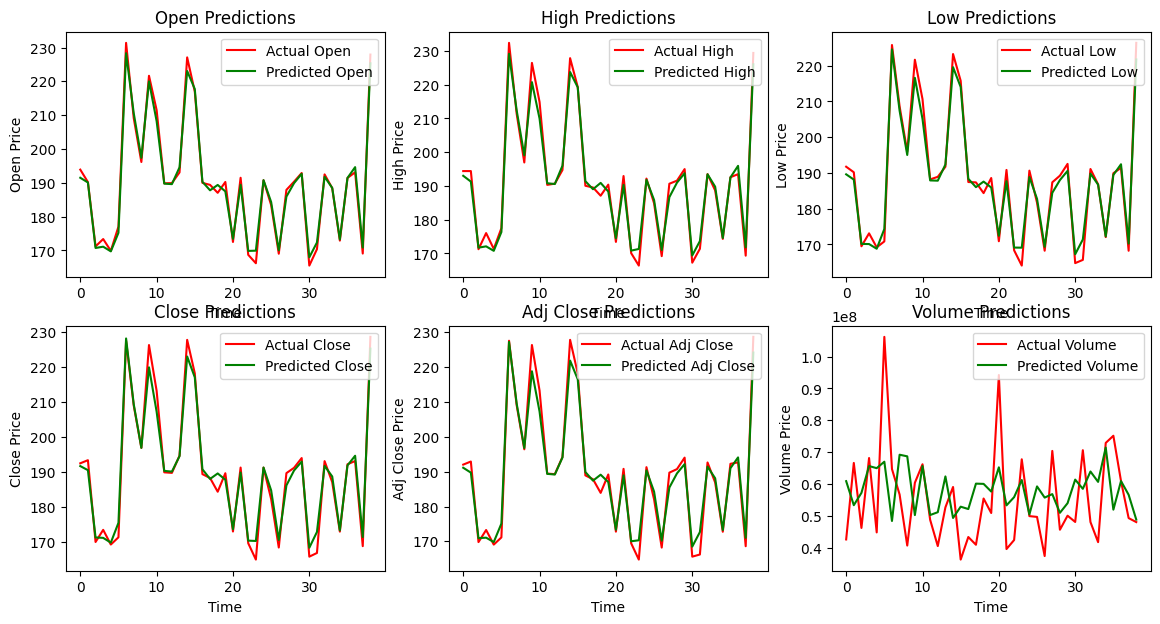

In [25]:
plt.figure(figsize=(14, 7))
for i, col in enumerate(df_scaled.columns):
    plt.subplot(2, 3, i + 1)
    plt.plot(y_test_rescaled[:, i], color='red', label=f'Actual {col}')
    plt.plot(model_predictions_rescaled[:, i], color='green', label=f'Predicted {col}')
    plt.title(f'{col} Predictions')
    plt.xlabel('Time')
    plt.ylabel(f'{col} Price')
    plt.legend()